In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [246]:
df=pd.read_csv("googleplaystore.csv")

In [247]:
df.sample(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1246,Pizza Hut,FOOD_AND_DRINK,4.4,321134,30M,"10,000,000+",Free,0,Everyone,Food & Drink,"June 12, 2018",4.7.0,4.1 and up
1616,StyleSeat,LIFESTYLE,4.7,20304,24M,"500,000+",Free,0,Everyone,Lifestyle,"July 31, 2018",4.35,4.0.3 and up
2706,Checkout 51: Grocery coupons,SHOPPING,4.1,52896,Varies with device,"10,000,000+",Free,0,Everyone,Shopping,"June 18, 2018",Varies with device,Varies with device
3596,Child Growth Tracking,PARENTING,4.4,498,Varies with device,"50,000+",Free,0,Everyone,Parenting,"July 25, 2018",1.5.3.1807,4.4 and up
2598,"Tapatalk - 100,000+ Forums",SOCIAL,4.1,285816,Varies with device,"10,000,000+",Free,0,Mature 17+,Social,"June 19, 2018",Varies with device,Varies with device
8750,Call Blocker & Blacklist,COMMUNICATION,4.0,6,4.2M,"1,000+",Free,0,Everyone,Communication,"July 13, 2018",3.1.0,4.0 and up
1618,Brit + Co,LIFESTYLE,3.9,987,4.5M,"10,000+",Free,0,Everyone,Lifestyle,"August 29, 2017",2.0.4,4.0 and up
5451,WiFi Access Point (hotspot),COMMUNICATION,3.9,684,61k,"100,000+",Free,0,Everyone,Communication,"May 14, 2015",1.1.2,2.3 and up
4097,E-NUM,FINANCE,4.0,10374,Varies with device,"500,000+",Free,0,Everyone,Finance,"October 24, 2016",Varies with device,Varies with device
5827,Ay,VIDEO_PLAYERS,3.8,11,3.6M,"5,000+",Free,0,Teen,Video Players & Editors,"May 4, 2018",1.0.261,2.3 and up


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Handling Outliers in the 'Rating' Column
In this step, we handle any outliers in the 'Rating' column of the dataset. Ratings in the Google Play Store typically range from 0 to 5. To ensure data integrity:
1. We use a lambda function to apply a check to each rating value. If the rating is between 0 and 5, it remains unchanged; otherwise, it is replaced with `NaN` (missing value).
2. After filtering out values outside this range, we use the `.fillna()` method to fill these missing values with the mean of the 'Rating' column. This approach ensures that we maintain a complete dataset and mitigate the impact of outliers on the analysis.

In [249]:
df['Rating']=df['Rating'].apply(lambda x: x if 0<=x<=5 else np.nan)
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The `clean_size(size)` function processes the 'Size' column by checking if it's a string, converting 'M' to float, 'k' to megabytes, and returns `NaN` for unrecognized formats. `df['Size'] = df['Size'].apply(clean_size)` applies this function.

In [251]:
def clean_size(size):
    if isinstance(size,str):
        if "M" in size:
            return float(size.replace("M",""))
        if "k" in size:
            return float(size.replace("k",""))/1024
        return np.nan
df['Size']=df['Size'].apply(clean_size)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [253]:
df.describe()

,Rating,Size
count,10841.000000,9145.000000
mean,4.191757,21.516165
std,0.478885,22.589084
min,1.000000,0.008301
25%,4.100000,4.900000
50%,4.200000,13.000000
75%,4.500000,30.000000
max,5.000000,100.000000


The code groups the data by 'Category', calculates the mean 'Size' for each category, and uses `fillna(category_mean)` to replace missing 'Size' values with the corresponding category mean.

In [254]:
category_mean=df.groupby('Category')['Size'].transform('mean')
df['Size']=df['Size'].fillna(category_mean)

In [255]:
# df['Size']=df['Size'].fillna(category_mean)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


The `clean_price(price)` function converts price strings to floats by removing the '$' sign, and `df['Price'].apply(clean_price)` applies this function; then, missing values are filled with the mean price.

In [257]:
def clean_price(price):
    if isinstance(price,str):
        if '$' in price:
            return float(price.replace('$',''))
        return np.nan
df['Price']=df['Price'].apply(clean_price)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           800 non-null    float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'Price Distribution')

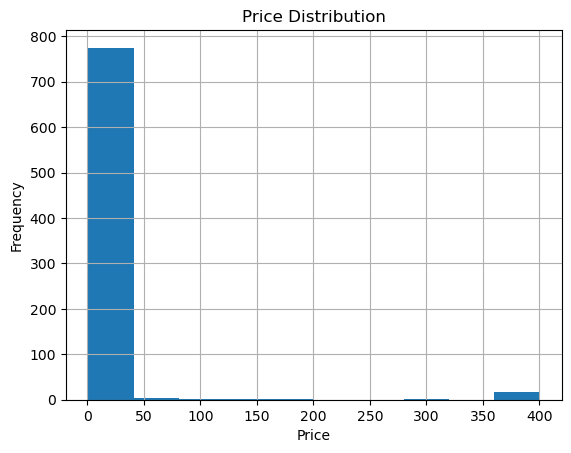

In [259]:
df['Price'].hist(bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

In [260]:
df['Price'].describe()

count    800.000000
mean      13.920838
std       57.195358
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

In [261]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

Text(0.5, 1.0, 'Price Distribution')

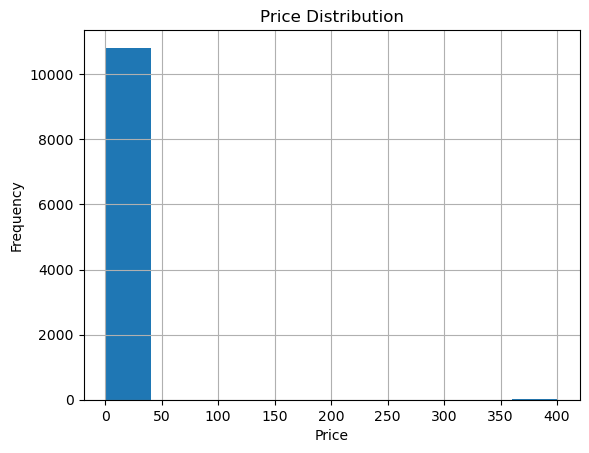

In [262]:
df['Price'].hist(bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

The code finds the most frequent category (`mode`) and replaces incorrect entries like "1.9" in the 'Category' column with "FAMILY".

In [263]:
df['Category'].mode()

0    FAMILY
Name: Category, dtype: object

In [264]:
df['Category']=df['Category'].replace("1.9","FAMILY")

In [265]:
df['Category'].value_counts()

Category
FAMILY                 1973
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

The `convert_to_float_version` function cleans the 'Android Ver' column by removing text like ' and up', converting version numbers to floats, and replacing invalid entries with `NaN`. The function is applied using `df['Android Ver'] = df['Android Ver'].apply(convert_to_float_version)`.

In [266]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [267]:
def convert_to_float_version(androidver):
    if isinstance(androidver, str):
        # Remove ' and up'
        androidver = androidver.replace(' and up', '')
        # Remove '.3 and up'
        androidver = androidver.replace('.3 and up', '')
        # Convert version number to float
        try:
            return float(androidver)
        except ValueError:
            return np.nan
    return np.nan  # Return NaN for non-string entries

# Apply the function to the Android Ver column
df['Android Ver'] = df['Android Ver'].apply(convert_to_float_version)

In [268]:
df['Android Ver'].value_counts()


Android Ver
4.1    2451
4.0    1375
4.4     980
2.3     652
5.0     601
4.2     394
2.2     244
4.3     243
3.0     241
2.1     134
1.6     116
6.0      60
7.0      42
3.2      36
2.0      32
5.1      24
1.5      20
3.1      10
8.0       6
7.1       3
1.0       2
Name: count, dtype: int64

In [269]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,"10,000+",Free,13.920838,Everyone,Art & Design,"January 7, 2018",1.0.0,NaN
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,"500,000+",Free,13.920838,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700000,"5,000,000+",Free,13.920838,Everyone,Art & Design,"August 1, 2018",1.2.4,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000000,"50,000,000+",Free,13.920838,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800000,"100,000+",Free,13.920838,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.000000,"5,000+",Free,13.920838,Everyone,Education,"July 25, 2017",1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.600000,100+,Free,13.920838,Everyone,Education,"July 6, 2018",1.0,4.1
10838,Parkinson Exercices FR,MEDICAL,4.191757,3,9.500000,"1,000+",Free,13.920838,Everyone,Medical,"January 20, 2017",1.0,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,13.310188,"1,000+",Free,13.920838,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,NaN


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     7666 non-null   float64
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [271]:
df['Android Ver']=df['Android Ver'].fillna(df['Android Ver'].mode())

In [272]:
df['Android Ver'].value_counts()

Android Ver
4.1    2452
4.0    1375
4.4     980
2.3     652
5.0     601
4.2     394
2.2     244
4.3     243
3.0     241
2.1     134
1.6     116
6.0      60
7.0      42
3.2      36
2.0      32
5.1      24
1.5      20
3.1      10
8.0       6
7.1       3
1.0       2
Name: count, dtype: int64

In [299]:
df['Android Ver'].unique()

array([4.1, nan, 4.2, 4.4, 2.3, 3. , 4. , 2.2, 5. , 6. , 1.6, 1.5, 2.1,
       7. , 5.1, 4.3, 2. , 3.2, 7.1, 8. , 3.1, 1. ])

Handle outlier in col price

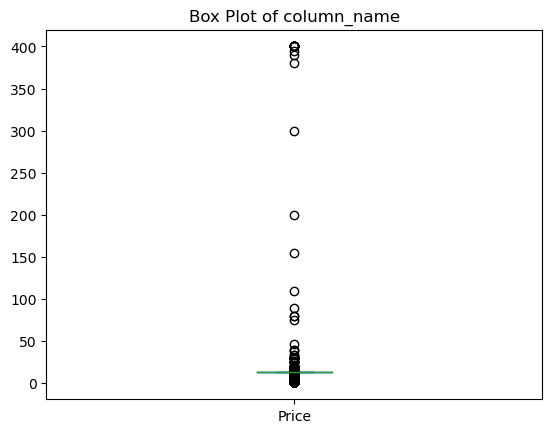

In [274]:
# Assume you have a DataFrame `df` and a numerical column 'column_name'
df['Price'].plot(kind='box')
plt.title('Box Plot of column_name')
plt.show()

In [275]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

df['Price']=df[df['Price'] >= Q1 - 1.5 * IQR]['Price']
df['Price']=df[df['Price'] <= Q3 + 1.5 * IQR]['Price']

_________________________________________________

The `clean_installs` function processes the 'Installs' column by removing commas and the '+' sign, converting the values to floats, and replacing invalid entries with `NaN`.

In [276]:
def clean_installs(cinstalls):
    if isinstance(cinstalls,str):
        cinstalls=cinstalls.replace(',','')
        if ('+')in cinstalls:
            return float(cinstalls.replace('+',''))
        return np.nan
df['Installs']=df['Installs'].apply(clean_installs)

In [277]:
df['Installs'].value_counts()

Installs
1.000000e+06    1579
1.000000e+07    1252
1.000000e+05    1169
1.000000e+04    1054
1.000000e+03     907
5.000000e+06     752
1.000000e+02     719
5.000000e+05     539
5.000000e+04     479
5.000000e+03     477
1.000000e+08     409
1.000000e+01     386
5.000000e+02     330
5.000000e+07     289
5.000000e+01     205
5.000000e+00      82
5.000000e+08      72
1.000000e+00      67
1.000000e+09      58
0.000000e+00      14
Name: count, dtype: int64

The `clean_type` function replaces '0' in the 'Type' column with 'Free', and missing values are filled with the most frequent value (`mode`).

In [278]:
df['Type'].value_counts()

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64

In [279]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [280]:
def clean_type(ctype):
    if isinstance(ctype, str) and '0' in ctype:
        return ctype.replace('0', 'Free')
    return ctype
df['Type']=df['Type'].apply(clean_type)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10839 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10041 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     7667 non-null   float64
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [283]:

df['Type']=df['Type'].fillna(df['Type'].mode())

In [284]:
df['Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Type
Non-Null Count  Dtype 
--------------  ----- 
10840 non-null  object
dtypes: object(1)
memory usage: 84.8+ KB


The code removes non-alphanumeric characters from the 'Reviews' column using regex, then converts it to a numeric type, replacing invalid entries with `NaN`.

In [286]:
df['Reviews'] = df['Reviews'].str.replace(r'[^\w\s]', '', regex=True)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [287]:
df['Reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype  
--------------  -----  
10840 non-null  float64
dtypes: float64(1)
memory usage: 84.8 KB


<h1>key insights</h1>

Most Expensive App:

In [288]:
df.loc[df['Price'].idxmax()]

App               Photo Editor & Candy Camera & Grid & ScrapBook
Category                                          ART_AND_DESIGN
Rating                                                       4.1
Reviews                                                    159.0
Size                                                        19.0
Installs                                                 10000.0
Type                                                        Free
Price                                                  13.920838
Content Rating                                          Everyone
Genres                                              Art & Design
Last Updated                                     January 7, 2018
Current Ver                                                1.0.0
Android Ver                                                  4.1
Name: 0, dtype: object

Genre with the Highest Number of Apps:

In [289]:
df['Genres'].value_counts().idxmax()

'Tools'

Average Size of Free vs. Paid Apps:

In [290]:
df.groupby('Type')['Size'].mean()

Type
Free    21.357876
Paid    19.339991
Name: Size, dtype: float64

Top 5 Most Expensive Apps with a Perfect Rating (5):

In [291]:
df[df['Rating'] == 5].nlargest(5, 'Price')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37.0,1000.0,Free,13.920838,Everyone,Comics,"June 26, 2018",2.0,NaN
612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4,1000.0,Free,13.920838,Mature 17+,Dating,"July 17, 2018",3.0,NaN
615,Awake Dating,DATING,5.0,2.0,70.0,100.0,Free,13.920838,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4
633,Spine- The dating app,DATING,5.0,5.0,9.3,500.0,Free,13.920838,Teen,Dating,"July 14, 2018",4.0,NaN
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0,100.0,Free,13.920838,Mature 17+,Dating,"August 1, 2018",8.2,NaN


Apps with More Than 50K Reviews:

In [292]:
len(df[df['Reviews'] > 50000])

2782

Average Price by Genre and Number of Installs:

In [293]:
df.groupby(['Genres', 'Installs'])['Price'].mean()

Genres  Installs  
Action  10.0          13.920838
        50.0          13.920838
        100.0         13.920838
        500.0         13.920838
        1000.0        13.920838
                        ...    
Word    100000.0      13.920838
        1000000.0     13.920838
        5000000.0     13.920838
        10000000.0    13.920838
        50000000.0    13.920838
Name: Price, Length: 920, dtype: float64

Apps with Rating Higher than 4.7 and Their Average Price:

In [294]:
filtered = df[df['Rating'] > 4.7]
filtered['Price'].mean()

13.920837500000005

Google’s Estimated Revenue:

In [295]:
high_installs = df[df['Installs'] >= 5000000]
revenue = high_installs['Price'].sum() * 0.3
revenue

11814.614786250002

Max and Min Sizes of Free vs. Paid Apps

In [296]:
df.groupby('Type')['Size'].agg(['min', 'max'])

,min,max
Type,,
Free,0.008301,100.0
Paid,0.013672,100.0


The code calculates the correlation matrix for 'Rating', 'Reviews', 'Size', and 'Price' and visualizes it using a heatmap to identify relationships between these variables.

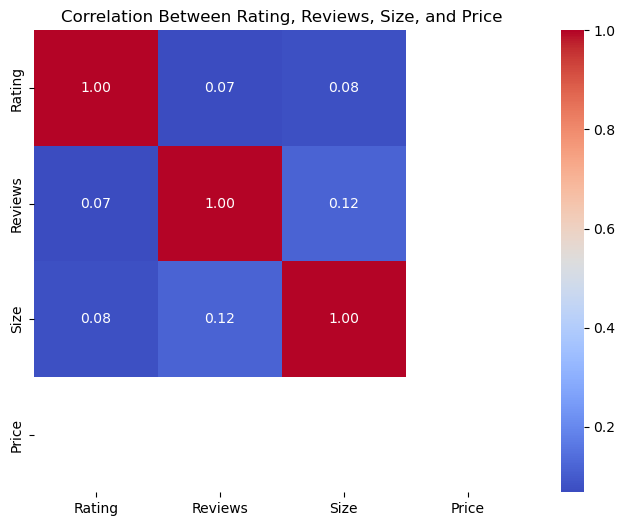

In [302]:
correlation_columns = ['Rating', 'Reviews', 'Size', 'Price']
correlation_matrix = df[correlation_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Rating, Reviews, Size, and Price")
plt.show()

App Count by Type Across Content Ratings:

In [297]:
df.groupby(['Content Rating', 'Type']).size()

Content Rating   Type
Adults only 18+  Free       3
Everyone         Free    8019
                 Paid     695
Everyone 10+     Free     380
                 Paid      33
Mature 17+       Free     479
                 Paid      20
Teen             Free    1156
                 Paid      52
Unrated          Free       2
dtype: int64

Apps Compatible with Android Version 4.x:

In [298]:
count_android_4 = len(df[df['Android Ver'].astype(str).str.startswith('4')])
count_android_4

5444